<a href="https://colab.research.google.com/github/brenddonandrade/Redes-Complexas/blob/main/Comparando_Funcoes_Comu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Instalacoes e Importacoes Necessarias

In [ ]:
# !pip install scipy

In [ ]:
import networkx as nx
import scipy as sp
import numpy as np
from math import factorial
import time 
import matplotlib .pyplot as plt

# Funcao Pessoal para o cáculo da comunicabilidade

In [ ]:
def matriz_comunicabilidade(matriz, n):
  matriz_padrao = matriz.copy()
  matriz_suporte_1 = matriz.copy()
  matriz_c = np.identity(len(matriz), float)
  matriz_c += matriz_padrao

  for k in range(2,n+1):
    
    if k > 1:
      
      # Eleva a matriz por k vezes
      matriz_padrao = np.matmul(matriz_padrao, matriz_suporte_1)
      matriz_suporte_2 = matriz_padrao/factorial(k)


      # soma as n matrizes
      matriz_c += matriz_suporte_2
  
  return matriz_c

# Transformar Dict do NetworkX em NumpyArray

In [ ]:
def cria_matriz_adj(G):

  nodes = len(G.adj.items())
  matriz_adj = np.zeros((nodes, nodes), int)

  for node, nodedict in G.adj.items():
    for key in nodedict.keys():
      matriz_adj[node][key] = 1
      matriz_adj[key][node] = 1

  return matriz_adj

In [ ]:
def nx_to_np(dict_comunica):
    nodes = dict_comunica.__len__()
    matriz_c = np.zeros((nodes, nodes), float)

    for node_i, nodedict in dict_comunica.items():
        for node_j, value in nodedict.items():
            matriz_c[node_i][node_j] = value

    return matriz_c            

# Criando a Comparacao

In [ ]:
# Metodos utilizados
# Metodo 1: Espectral (nx.communicability(G))
# Metodo 2: Exponencial (nx.communicability_exp(G))
# Metodo 3: Serie de Fourier da matriz (meu)

# Numero de nós
N = 100

# Grafo a ser comparado
# G = nx.complete_graph(N)
# G = nx.cycle_graph(N)
# G = nx.star_graph(N)
G = nx.karate_club_graph()

# Cria matriz adj
matriz_adj = cria_matriz_adj(G)

# Cria matriz comunicabilidade usando funcoes existentes
comunica_espectral = nx.communicability(G)
comunica_expo = nx.communicability_exp(G)

# Calcula a comunicabilidade
# Até onde o codigo é consistente?

# Matriz usando a teoria espectral
matriz_comunica_1 = nx_to_np(comunica_espectral)

# Usando a fórmula exponencial
matriz_comunica_2 = nx_to_np(comunica_expo)

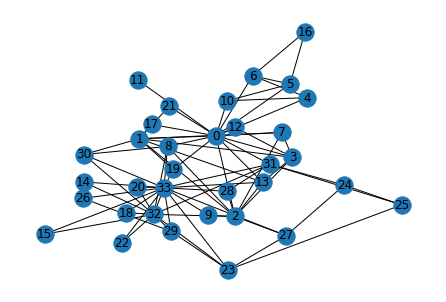

In [ ]:
nx.draw_kamada_kawai(G, with_labels=True)

In [ ]:
# Calculo da media
def matriz_media(matriz):
    matriz_med = (np.sum(matriz))/(len(matriz)**2)
    return matriz_med

In [ ]:
# Media das matrizes
media_1 = matriz_media(matriz_comunica_1)
media_2 = matriz_media(matriz_comunica_2)

print(media_1)
print(media_2)

17.905627638866257
17.905627638866257


In [ ]:
# Calculo do tempo Expectral

custo = {}

def calc_eficiencia(n):
    # Tempo
    tempo = []

    #  Calculo do tempo Espectral
    time_start = time.time()
    # Fazendo o calculo 10x parater o valor aproximado
    for i in range(10):
        nx.communicability(G)
    time_end = time.time()
    tempo.append((time_end - time_start)/10)

    # Calculo do tempo Exponencial
    time_start = time.time()
    for i in range(10):
        nx.communicability_exp(G)
    time_end = time.time()
    tempo.append((time_end - time_start)/10)

    # Calculo do tempo Me
    time_start = time.time()
    for i in range(10):
        matriz_c = matriz_comunicabilidade(matriz_adj,n)    
    time_end = time.time()
    tempo.append((time_end - time_start)/10)


    # Erro
    comparacao = []
    # Comparacao com a espectral
    media = matriz_media(matriz_c)
    comparacao.append(abs((media/media_1) * 100))

    # Comparacao com a exponencial
    comparacao.append(abs((media/media_2) * 100))



    custo[n] = [tempo, comparacao]
    
    return custo
    

for i in range(15,21):
    calc_eficiencia(i)

In [ ]:
x = []
tempo_1 = []
tempo_2 = []
tempo_3 = []

comparacao_1 = []
comparacao_2 = []

for n, custo_value in custo.items():
    x.append(n)

    # Criando lista tempo
    tempo_1.append(custo_value[0][0])
    tempo_2.append(custo_value[0][1])
    tempo_3.append(custo_value[0][2])

    # Criando lista Comparacao
    comparacao_1.append(custo_value[1][0])
    comparacao_2.append(custo_value[1][1])

# Criando Gráfico

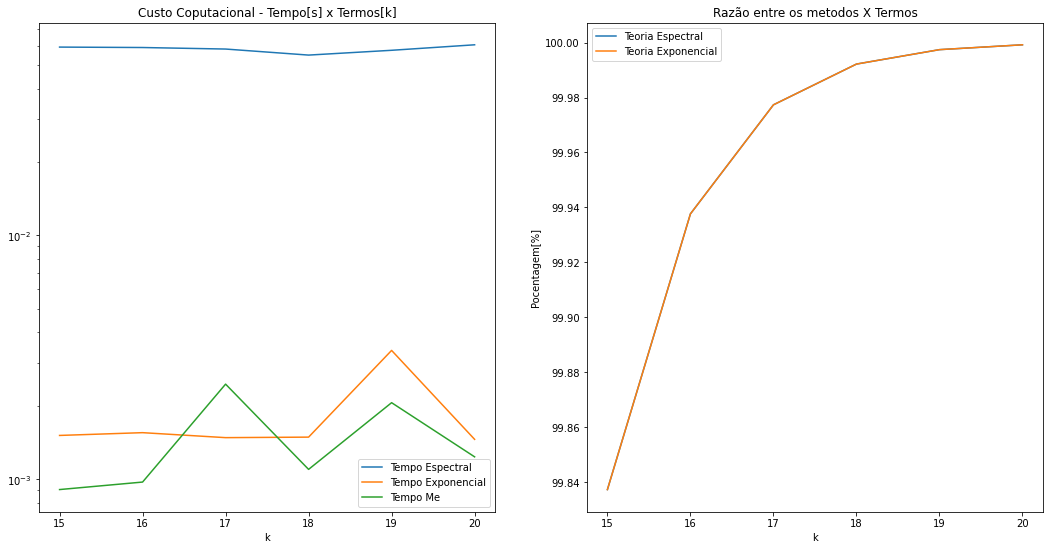

In [ ]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharex=True,
                                    figsize=(18, 9))

# Grafico 1 - Custo do tempo
ax1.set_title('Custo Coputacional - Tempo[s] x Termos[k]')
ax1.set_xlabel('k')
ax1.set_xticks(x)
ax1.set_yscale('log')


ax1.plot(x, tempo_1, label='Tempo Espectral')
ax1.plot(x, tempo_2, label='Tempo Exponencial')
ax1.plot(x, tempo_3, label='Tempo Me')
ax1.legend()


# Grafico 2 - Comparacao
ax2.set_title('Razão entre os metodos X Termos[k]')
ax2.set_xlabel('k')
ax2.set_xticks(x)
ax2.set_ylabel('Porcentagem')

ax2.plot(x, comparacao_1, label='Teoria Espectral')
ax2.plot(x, comparacao_2, label='Teoria Exponencial')
ax2.legend()


# Salvar a imagemq
# fig.savefig('Comparacao.pdf', format='pdf')

In [ ]:
print(custo)

{15: [[0.05925431251525879, 0.00150909423828125, 0.0009047985076904297], [99.83733953894567, 99.83733953894567]], 16: [[0.05901925563812256, 0.0015491485595703126, 0.0009712457656860351], [99.93766908468109, 99.93766908468109]], 17: [[0.05817210674285889, 0.0014779329299926757, 0.0024507761001586912], [99.97734849508602, 99.97734849508602]], 18: [[0.05494194030761719, 0.001485157012939453, 0.0010949373245239258], [99.99217816416444, 99.99217816416444]], 19: [[0.05749084949493408, 0.0033705472946166993, 0.002056527137756348], [99.99742681318001, 99.99742681318001]], 20: [[0.0605543851852417, 0.0014542818069458007, 0.0012326955795288086], [99.99919203798055, 99.99919203798055]]}
